In [3]:
import sympy as sp
sp.init_printing(use_unicode=False, wrap_line=False, no_global=True)
import matplotlib.pyplot as plt
from IPython.display import display,Latex

# Занятие 17
# Алгебра

### Задание 1.

Составить матрицу квадратичной формы $7x^2+10\sqrt{3}xy-3y^2−20z^2$. Привести квадратичную форму к каноническому виду с помощью перехода к новому базису.

In [23]:
x, y, z = sp.symbols('x y z')
u = 7 * x**2 + 10 * sp.sqrt(3) * x * y - 3 * y**2 - 20 * z**2
A = sp.Matrix([[7, 5 * sp.sqrt(3), 0], [5 * sp.sqrt(3), -3, 0], [0, 0, -20]]) # матрица квадратичной формы
display(A)
# проверим, что матрица задает квадратичную форму
X = sp.Matrix((x, y, z)) 
res = sp.simplify(sp.expand(X.transpose() * A * X))
display(X, res, res[0] - u)

[             ___     ]
[   7     5*\/ 3    0 ]
[                     ]
[    ___              ]
[5*\/ 3     -3      0 ]
[                     ]
[   0        0     -20]

[x]
[ ]
[y]
[ ]
[z]

[   2        ___          2       2]
[7*x  + 10*\/ 3 *x*y - 3*y  - 20*z ]

In [24]:
ev = A.eigenvects() # собственные векторы
Pnorm = [p[2][0].normalized() for p in ev] # нормализуем собственные векторы
P = Pnorm[0].row_join(Pnorm[1]).row_join(Pnorm[2]) # матрица перехода
Anew = P.transpose() * A * P # матрица квадратичной формы в новом базисе
display(sp.simplify(Anew))
display(sp.simplify(sp.expand(X.transpose() * Anew * X))[0])

[-20  0   0 ]
[           ]
[ 0   -8  0 ]
[           ]
[ 0   0   12]

### Задание 2.
Привести квадратичную форму Примера 1 к каноническому виду с помощью выделения полных квадратов. Проверить выполнение Закона инерции.

In [25]:
display(32 * x**2 - (sp.sqrt(3) * y - 5 * x)**2 - 20 * z**2)
Y = sp.Symbol('Y')
yNew = sp.solve(Y - sp.sqrt(3) * y + 5 * x, y)[0]
u1 = sp.simplify(sp.expand(u.subs(y, yNew)))
u1

Закон инерции выполняется

### Задание 3.
Определить тип кривой второго порядка, заданной уравнением
$$
97x^2-144xy+97y^2+482x-532y=3452
$$

In [26]:
x1, y1 = sp.symbols('x1 y1')
eq = 97 * x**2 - 144 * x * y + 97 * y**2 + 482 * x - 532 * y - 3452
A = sp.Matrix([[97,-72], [-72,97]])
alpha = sp.acot((A[0, 0] - A[1, 1]) / (2 * A[0, 1])) / 2 # угол поворота чтобы избавиться от слагаемого с xy
display(alpha)

In [27]:
A2 = sp.Matrix([[97, -72, 241], [-72, 97, -266], [241, -266, -3452]]) # матрица ко-эфов уравнения
display(A2)
X2 = sp.Matrix((x, y, 1)) # вектор переменных
display(X2)
sp.simplify(sp.expand(X2.transpose() * A2 * X2)) # получили исходное уравнение, значит матрица его действительно определяет

[97   -72    241 ]
[                ]
[-72   97   -266 ]
[                ]
[241  -266  -3452]

[x]
[ ]
[y]
[ ]
[1]

[    2                         2               ]
[97*x  - 144*x*y + 482*x + 97*y  - 532*y - 3452]

[                               ___  ]
[                         -25*\/ 2   ]
[    25           0       ---------- ]
[                             2      ]
[                                    ]
[                                ___ ]
[                         -507*\/ 2  ]
[    0           169      -----------]
[                              2     ]
[                                    ]
[      ___          ___              ]
[-25*\/ 2    -507*\/ 2               ]
[----------  -----------     -3452   ]
[    2            2                  ]

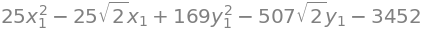

In [28]:
P = sp.Matrix([[sp.cos(alpha), -sp.sin(alpha), 0], [sp.sin(alpha), sp.cos(alpha), 0], [0, 0, 1]]) # трехмерная матрица поворота
A3 = sp.simplify(sp.expand((P.transpose() * A2 * P))) # матрица ко-эфов после поворота
display(A3)
X1 = sp.Matrix((x1, y1, 1))
sp.simplify(sp.expand((X1.transpose() * A3 * X1)[0]))

In [30]:
Xnew = sp.Matrix((x1, y1, 1))
Xnew[0] -= A3[0, 2] / A3[0, 0]
Xnew[1] -= A3[1, 2] / A3[1, 1]
display(Xnew)
eqNew = sp.simplify(sp.expand(Xnew.transpose() * A3 * Xnew))[0] # избавляемся от слагаемых с x и y
display(eqNew)

[        ___ ]
[      \/ 2  ]
[ x1 + ----- ]
[        2   ]
[            ]
[         ___]
[     3*\/ 2 ]
[y1 + -------]
[        2   ]
[            ]
[     1      ]

In [31]:
free = eqNew.subs({x1 : 0, y1 : 0})
eqLast = eqNew / (-free) + 1 # делим уравнение на 4225 и переносим свободный член в правую часть
sp.Eq(eqLast, 1)

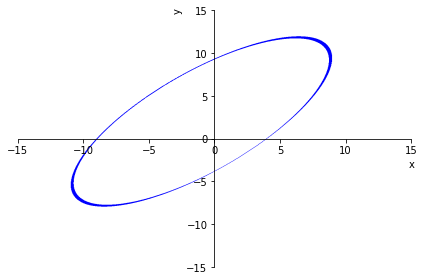

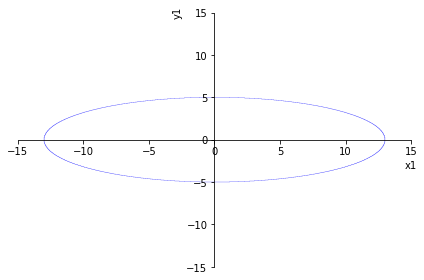

In [32]:
sp.plot_implicit(eq, (x, -15, 15), (y, -15, 15))
sp.plot_implicit(eqLast - 1, (x1, -15, 15), (y1, -15, 15))

### Задание 4.

Определить тип кривой второго порядка, заданной уравнением
$$
x^2+2xy+y^2-4x+4y=4
$$

In [33]:
x1, y1 = sp.symbols('x1 y1')
eq = x**2 + 2 * x * y + y**2 - 4 * x + 4 * y - 4

A = sp.Matrix([[1, 1], [1, 1]])
alpha = sp.acot((A[0, 0] - A[1, 1]) / (2 * A[0, 1])) / 2 # угол поворота чтобы избавиться от слагаемого с xy
display(alpha)

In [34]:
A2 = sp.Matrix([[1, 1, -2], [1, 1, 2], [-2, 2, -4]]) # матрица ко-эфов уравнения
display(A2)
X2 = sp.Matrix((x, y, 1)) # вектор переменных
display(X2)
sp.simplify(sp.expand(X2.transpose() * A2 * X2)) # получили исходное уравнение, значит матрица его действительно определяет

[1   1  -2]
[         ]
[1   1  2 ]
[         ]
[-2  2  -4]

[x]
[ ]
[y]
[ ]
[1]

[ 2                  2          ]
[x  + 2*x*y - 4*x + y  + 4*y - 4]

[2     0        0   ]
[                   ]
[                ___]
[0     0     2*\/ 2 ]
[                   ]
[       ___         ]
[0  2*\/ 2     -4   ]

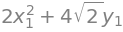

In [35]:
P = sp.Matrix([[sp.cos(alpha), -sp.sin(alpha), 0], [sp.sin(alpha), sp.cos(alpha), 0], [0, 0, 1]]) # трехмерная матрица поворота
A3 = sp.simplify(sp.expand((P.transpose() * A2 * P))) # матрица ко-эфов после поворота
display(A3)
X1 = sp.Matrix((x1, y1, 1))
eqNew = sp.simplify(sp.expand((X1.transpose() * A3 * X1)[0])) - A3[2, 2]
eqNew

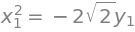

In [36]:
eqLast = sp.Eq(x1**2, sp.solve(eq_new, x1**2)[0]) # выражаем x^2, получаем уравнение параболы
eqLast

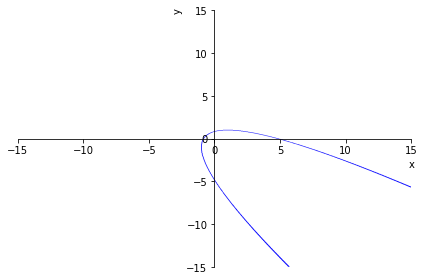

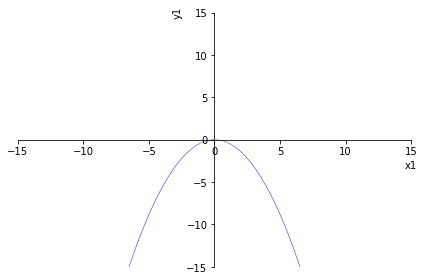

In [37]:
sp.plot_implicit(eq, (x, -15, 15), (y, -15, 15))
sp.plot_implicit(eqLast, (x1, -15, 15), (y1, -15, 15))

###  Индивидуальное задание

Составить матрицу квадратичной формы и привести ее к каноническому виду с помощью перехода к новому базису.


In [40]:
u = 5 * x**2 + 2 * sp.sqrt(3) * x * y + 3 * y**2 + 9 * z**2
A = sp.Matrix([[5, sp.sqrt(3), 0], [sp.sqrt(3), 3, 0], [0, 0, 9]]) # матрица квадратичной формы
display(A)
# проверим, что матрица задает квадратичную форму
X = sp.Matrix((x, y, z)) 
res = sp.simplify(sp.expand(X.transpose() * A * X))
display(X, res, res[0] - u)

[         ___   ]
[  5    \/ 3   0]
[               ]
[  ___          ]
[\/ 3     3    0]
[               ]
[  0      0    9]

[x]
[ ]
[y]
[ ]
[z]

[   2       ___          2      2]
[5*x  + 2*\/ 3 *x*y + 3*y  + 9*z ]

In [42]:
ev = A.eigenvects() # собственные векторы
Pnorm = [p[2][0].normalized() for p in ev] # нормализуем собственные векторы
P = Pnorm[0].row_join(Pnorm[1]).row_join(Pnorm[2]) # матрица перехода
Anew = P.transpose() * A * P # матрица квадратичной формы в новом базисе
display(sp.simplify(Anew), sp.simplify(sp.expand(X.transpose() * Anew * X))[0])

[2  0  0]
[       ]
[0  6  0]
[       ]
[0  0  9]